`ApJdataFrames` Cottaar_2014
---
`Title`: IN-SYNC I: Homogeneous Stellar Parameters from High-resolution APOGEE Spectra for Thousands of Pre-main Sequence Stars  
`Authors`: Michiel Cottaar, Kevin R Covey, Michael R Meyer, David L Nidever, Keivan G. Stassun, Jonathan B Foster, Jonathan C Tan, S Drew Chojnowski, Nicola da Rio, Kevin M Flaherty, Peter M Frinchaboy, Michael Skrutskie, Steven R Majewski, John C Wilson, and Gail Zasowski  

Data is from this paper:  
http://iopscience.iop.org/article/10.1088/0004-637X/794/2/125/meta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 150

In [2]:
import astropy

//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
from astropy.io import fits
hdulist1 = fits.open('../data/Cottaar2014/per_epoch.fit')
hdulist2 = fits.open('../data/Cottaar2014/per_star.fit')

In [4]:
table1 = hdulist1[1]

In [5]:
table1.columns

ColDefs(
    name = '2MASS'; format = '20A'
    name = 'date'; format = 'E'
    name = 'S/N'; format = 'E'
    name = 'Teff'; format = 'E'
    name = 'sig_Teff'; format = 'E'
    name = 'eta_Teff'; format = 'E'
    name = 'log(g)'; format = 'E'
    name = 'sig_log(g)'; format = 'E'
    name = 'eta_log(g)'; format = 'E'
    name = 'vsini'; format = 'E'
    name = 'sig_vsini'; format = 'E'
    name = 'eta_vsini'; format = 'E'
    name = 'R_H'; format = 'E'
    name = 'sig_R_H'; format = 'E'
    name = 'eta_R_H'; format = 'E'
)

In [6]:
table1.data.shape

(3003,)

In [7]:
table1.size

228228

In [8]:
table1

In [9]:
from astropy.table import Table

In [10]:
tt = Table(data=table1.data)

In [11]:
tt.write('../data/Cottaar2014/per_epoch.csv', format='csv')

In [12]:
dat = pd.read_csv('../data/Cottaar2014/per_epoch.csv')

In [13]:
dat.head()

,2MASS,date,S/N,Teff,sig_Teff,eta_Teff,log(g),sig_log(g),eta_log(g),vsini,sig_vsini,eta_vsini,R_H,sig_R_H,eta_R_H
0,2M03391582+3124306,2456169.0,20.640400,3525.389893,69.249603,0.483759,3.772381,0.189915,-0.367382,21.626106,2.602700,0.742116,0.524537,0.135287,-0.459976
1,2M03391582+3124306,2456173.0,20.839701,3511.069336,59.976250,0.311854,3.919029,0.220840,0.389681,20.478422,2.778543,0.257670,0.665639,0.173122,0.495296
2,2M03391582+3124306,2456675.5,19.124100,3632.849854,93.598015,1.532931,4.374870,0.221589,2.554291,16.485289,2.256506,-1.576832,0.506673,0.115694,-0.719942
3,2M03391582+3124306,2456562.0,8.898240,3745.674805,216.315414,1.171043,4.185779,0.530020,0.663133,16.531729,8.050102,-0.407537,0.971413,0.401513,0.973834
4,2M03391582+3124306,2456283.5,20.483299,3556.395752,91.700180,0.705265,3.949329,0.284949,0.405249,20.004354,3.433231,0.062827,0.782158,0.206663,0.988735


In [14]:
dat.columns

Index(['2MASS', 'date', 'S/N', 'Teff', 'sig_Teff', 'eta_Teff', 'log(g)',
       'sig_log(g)', 'eta_log(g)', 'vsini', 'sig_vsini', 'eta_vsini', 'R_H',
       'sig_R_H', 'eta_R_H'],
      dtype='object')

In [15]:
sns.set_context('talk', font_scale=1.0)

In [16]:
%config InlineBackend.figure_format = 'svg'

In [17]:
dat.columns

Index(['2MASS', 'date', 'S/N', 'Teff', 'sig_Teff', 'eta_Teff', 'log(g)',
       'sig_log(g)', 'eta_log(g)', 'vsini', 'sig_vsini', 'eta_vsini', 'R_H',
       'sig_R_H', 'eta_R_H'],
      dtype='object')

In [18]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

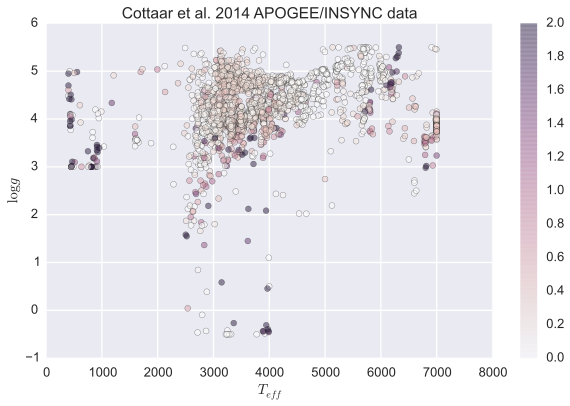

In [19]:
plt.figure(figsize=[10, 6])
sc = plt.scatter(dat['Teff'], dat['log(g)'], c=dat['R_H'], vmin=0, vmax=2, s=35, cmap=cmap, alpha=0.5)
plt.colorbar(sc)
plt.xlabel('$T_{eff}$')
plt.ylabel('$\log{g}$')
plt.title('Cottaar et al. 2014 APOGEE/INSYNC data')

In [20]:
import numpy as np

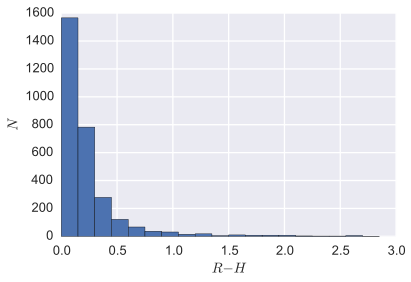

In [21]:
plt.figure(figsize=[6, 4])
plt.hist(dat['R_H'], bins=np.arange(0, 3, 0.15));
plt.xlabel('$R-H$')
plt.ylabel('$N$')